In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn methods needed for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
pd.read_csv('../data/genre_dataset.csv').columns

Index(['name', 'artist', 'album', 'id', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

In [4]:
# Prepare data
raw_data = pd.read_csv('../data/genre_dataset.csv')

data = raw_data[
    ['danceability', 'energy', 'valence', 'tempo', 'instrumentalness', 
     'liveness', 'speechiness', 'genre']
]

features = ['danceability', 'energy', 'valence', 'tempo', 
            'instrumentalness', 'liveness', 'speechiness']
target = 'genre'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train the model
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [6]:
# Evaluations
y_pred = logistic_model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.874

Confusion Matrix:
 [[188   7   2   0   3]
 [ 17 164   7  10   2]
 [  0  16 178   1   5]
 [  2  18   3 172   5]
 [  1   7  10  10 172]]

Classification Report:
               precision    recall  f1-score   support

   classical       0.90      0.94      0.92       200
     country       0.77      0.82      0.80       200
 heavy metal       0.89      0.89      0.89       200
     hip hop       0.89      0.86      0.88       200
      techno       0.92      0.86      0.89       200

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



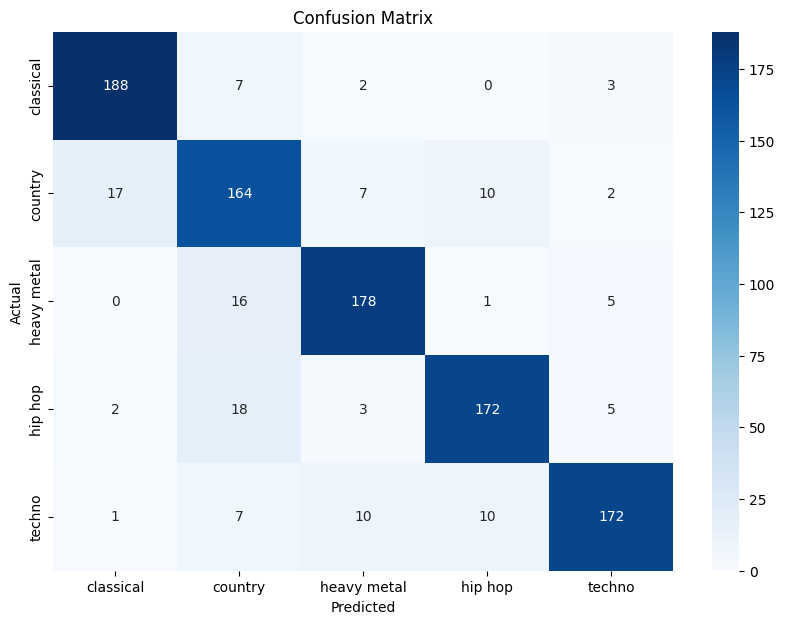

In [10]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('../figs/logistic_conf_mat.png')
plt.show()

In [8]:
# Investigate misclassified instances
misclassified = X_test[y_test != y_pred].copy(deep=True)
misclassified['Actual'] = y_test[y_test != y_pred]
misclassified['Predicted'] = y_pred[y_test != y_pred]
misclassified = raw_data[['name', 'artist']].join(misclassified, how='inner')

In [9]:
misclassified

,name,artist,danceability,energy,valence,tempo,instrumentalness,liveness,speechiness,Actual,Predicted
22,The Last Gunfighter Ballad,Johnny Cash,0.643,0.407,0.721,82.612,0.000013,0.1570,0.3210,country,hip hop
28,John O'Halloran,Danny Doyle,0.289,0.148,0.206,104.542,0.000000,0.1120,0.0360,country,classical
77,Lente In Athene,Cora Marie,0.262,0.792,0.530,167.746,0.001010,0.4680,0.0349,country,heavy metal
96,King Jesus,Big Joe Williams,0.470,0.166,0.593,85.665,0.468000,0.4420,0.0701,country,classical
133,Honesuckle,Buck Owens,0.661,0.723,0.970,96.757,0.858000,0.3220,0.0275,country,techno
...,...,...,...,...,...,...,...,...,...,...,...
4619,Forever Your Mouth,IVVVO,0.234,0.938,0.221,129.898,0.831000,0.3790,0.3840,techno,heavy metal
4692,UK74R1406070,Aleksi Perälä,0.403,0.301,0.180,168.735,0.906000,0.1030,0.0813,techno,classical
4860,Romance,Seiko Matsuda,0.758,0.721,0.766,142.363,0.000000,0.1000,0.0381,techno,country
4941,ヘップバーンによろしく,Yu Hayami,0.578,0.518,0.199,76.878,0.000233,0.1170,0.0250,techno,country
